In [1]:
DATOS_DIR = '../Datos/'
FUENTES_DIR = '../FUENTES/'

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

---
El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos

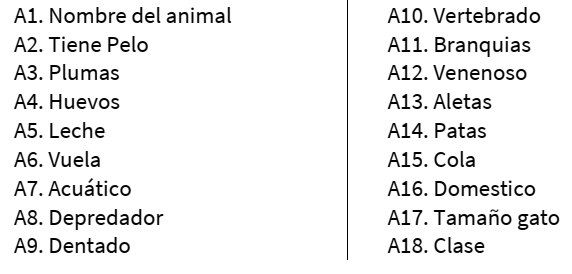

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

In [2]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

import RN_Clustering as rn
import chardet
import matplotlib.pyplot as plt
from sklearn import preprocessing
import grafica_SOM as gr

nombre_archivo = DATOS_DIR + 'zoo.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza
print(df)

# recupera todas las columnas salvo primera (animal) y última (clase)
X = np.array( df.iloc[:,1:-1] )
T_raw = np.array( df.iloc[:,-1])

             animal  Tiene_Pelo  Tiene_Plumas  Nace_de_huevo  Toma_Leche  \
0    oso_hormiguero           1             0              0           1   
1          antilope           1             0              0           1   
2            robalo           0             0              1           0   
3               oso           1             0              0           1   
4            jabali           1             0              0           1   
..              ...         ...           ...            ...         ...   
96          canguro           1             0              0           1   
97           avispa           1             0              1           0   
98             lobo           1             0              0           1   
99           gusano           0             0              1           0   
100      troglodito           0             1              1           0   

     Vuela  Acuatico  Depredador  Dentado  Vertebrado  Respira  Venenoso  \
0        0 

---
Utilice los ejemplos del archivo hojas.csv para entrenar un perceptrón que permita reconocer cuando se trata de una hoja de helecho. Utilice una velocidad de aprendizaje (parámetro alfa) de 0.01 y una máxima
cantidad de iteraciones MAX_ITE=300.

In [3]:
barras = pd.value_counts(df['Clase'])
print(barras)

Mamifero        41
Ave             20
Pez             13
Invertebrado    10
Insecto          8
Reptil           5
Anfibio          4
Name: Clase, dtype: int64


In [4]:
#-- la columna 0 tiene el nombre del animal y no se usa
entradas = np.array(df.iloc[:,1:17])

# encoder = preprocessing.LabelEncoder()
# T = encoder.fit_transform(datos['Clase'])
# nomClases = sorted(pd.unique(datos['Clase']))

dfDummies = pd.get_dummies(df['Clase'])
nomClases = dfDummies.columns.values
T = np.array(dfDummies, dtype='int')
T[:5,:]

array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]])

In [5]:
alfa = 0.2
filas = 4
columnas = 5
vecindad = 2
ite_reduce = 8
dibujar = False

[w_O, ubicaciones2D] = rn.SOM_entrena(entradas, filas, columnas, alfa, vecindad, ite_reduce, dibujar)
   

Iteraciones:  32


Anfibio  cant =  4
Ave  cant =  20
Insecto  cant =  8
Invertebrado  cant =  10
Mamifero  cant =  41
Pez  cant =  13
Reptil  cant =  5


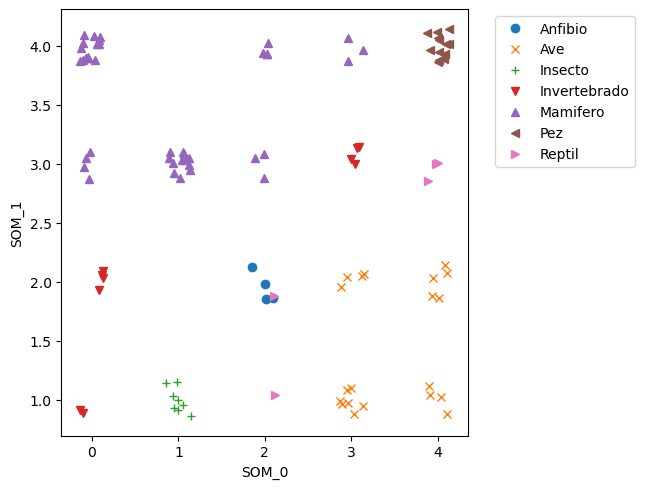

In [6]:
# gr.SOM_scatter(entradas2D, T, nomClases)
#-- Diagrama de dispersión de los clusters --
ruido = np.random.uniform(-0.15, 0.15, ubicaciones2D.shape)
marcador = ['o', 'x', '+', 'v', '^', '<', '>', 's', 'd', 'p']
ID=0
for especie in nomClases:
    cuales = df['Clase']==especie
    
    print(especie, " cant = ", sum(cuales*1))
    
    plt.plot(ubicaciones2D[cuales,0]+ruido[cuales,0], \
             ubicaciones2D[cuales,1]+ruido[cuales,1], marcador[ID],
             label=especie)
    ID = ID+1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.ylabel('SOM_1')
plt.xlabel('SOM_0') 
plt.show() 
    

In [7]:
#--- asignar los ejemplos a los centros --
CantEjemplos = entradas.shape[0]
asignaciones = np.zeros(CantEjemplos, dtype='int')
mapa = np.zeros([CantEjemplos, 3])
for e in range(CantEjemplos):
    nroNeurona = np.argmin(np.sum((w_O-entradas[e,:])**2,axis=1))
    asignaciones[e] = nroNeurona


#=== clases x clusters ===
clases = np.argmax(T, axis=1)
cantNeuronas = filas*columnas
cant = np.zeros((cantNeuronas, T.shape[1]))
for e in range(T.shape[0]):
    cant[asignaciones[e], clases[e]] = cant[asignaciones[e], clases[e]] + 1

    
print('\nEspecies x neurona (matriz de OCULTAS x expecies\n', end='')    
print(cant) 


Especies x neurona (matriz de OCULTAS x expecies
[[ 0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  8.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  7.  0.  0.  0.  0.  0.]
 [ 0.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.  0.  1.]
 [ 0.  4.  0.  0.  0.  0.  0.]
 [ 0.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0. 12.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0. 15.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.]
 [ 0.  0.  0.  0.  0. 13.  0.]]


In [8]:
claseSalida = np.argmax(cant, axis=1)
maxSalida = np.max(cant, axis=1)
claseSalida[maxSalida==0]=-1
mapa=np.zeros((filas,columnas),dtype='int')
for o in range(cantNeuronas):
    (fil,col) = rn.ubicacion(o,filas,columnas)
    mapa[filas-fil-1,col]= claseSalida[o]
    
print(nomClases)
print("-- MAPA --")
print(mapa)

['Anfibio' 'Ave' 'Insecto' 'Invertebrado' 'Mamifero' 'Pez' 'Reptil']
-- MAPA --
[[ 3  2  6  1  1]
 [ 3 -1  0  1  1]
 [ 4  4  4  3  6]
 [ 4 -1  4  4  5]]


In [9]:
verUbicaciones=np.zeros((filas,columnas),dtype='int')
for o in range(cantNeuronas):
    (fil,col) = rn.ubicacion(o,filas,columnas)
    verUbicaciones[fil,col]= o
print("\nUbicaciones")
print(verUbicaciones)


Ubicaciones
[[15 16 17 18 19]
 [10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]


In [10]:
#-- Visualizar nombres de animales ---
# ['Anfibio' 'Ave' 'Insecto' 'Invertebrado' 'Mamifero' 'Pez' 'Reptil']
c1 = np.array(df['Clase']=='Mamifero')
c2 = np.array(asignaciones)==0
cuales = c1 * c2
print(df.iloc[cuales,0])

Series([], Name: animal, dtype: object)
